---

<h1><center>XGBoost Prediction of the Popularity of Songs </center></h1>

---

<h1>Import Packages</h1>

In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<h1>Load and Process the Data</h1>

In [5]:
# dset = pd.read_csv('tracks.csv', index_col = 0) 
# print(dset)

# load data
dataset = np.loadtxt('tracks.csv', delimiter=",", skiprows=1) #Read only the numbers
print(dataset.shape)

# split data into X and y
X = dataset[:, 1:dataset.shape[1]+1]
y = dataset[:, 0]
print(X, y)
print(X.shape, y.shape)

# split training and testing data (test : train = 20% : 80%)
train_data_number = int(dataset.shape[0] * 0.8)
test_data_number = dataset.shape[0] - train_data_number
print('train data num:', train_data_number, '\ntest data num:', test_data_number)
train_X, test_X = X[:train_data_number], X[train_data_number:]
train_y, test_y = y[:train_data_number], y[train_data_number:]
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)


(102433, 18)
[[3.67897757e-02 0.00000000e+00 5.71573604e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [2.97655332e-02 0.00000000e+00 6.70050761e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 [3.35514720e-02 0.00000000e+00 8.09137056e-01 ... 8.82252136e-03
  6.30000000e-01 4.61538462e-01]
 ...
 [3.58588761e-02 0.00000000e+00 5.70558376e-01 ... 1.15335526e-06
  5.50000000e-01 9.23076923e-01]
 [5.04952871e-02 0.00000000e+00 5.68527919e-01 ... 1.13561133e-05
  3.80000000e-01 9.23076923e-01]
 [2.94530284e-02 0.00000000e+00 7.76649746e-01 ... 3.11715172e-03
  6.70000000e-01 9.23076923e-01]] [ 9.  9.  9. ... 66. 50. 72.]
(102433, 17) (102433,)
train data num: 81946 
test data num: 20487
(81946, 17) (20487, 17) (81946,) (20487,)


<h1>Initial Model: All Default Parameters</h1>

Set Up Parameters

In [8]:
# set up parameters
param = {'gamma': 0, 'seed': 0}

param['booster'] = 'gbtree' #default 
param['eta'] = 0.3 #default
param['objective'] = 'reg:squarederror' #default 
param['eval_metric'] = 'rmse' #if default, according to objective #This one is for training

print(param)

{'gamma': 0, 'seed': 0, 'booster': 'gbtree', 'eta': 0.3, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}


Train and Calculate the RMSE

In [12]:
# train
model = xgb.XGBRegressor(**param) 
model.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
preds = model.predict(test_X)

#This one is extra, for the result
rmse = mean_squared_error(test_y, preds, squared = False)
rmse_train = mean_squared_error(train_y, model.predict(train_X), squared = False)
print("RMSE for Test Data:", rmse)
print("RMSE for Train Data:", rmse_train)

RMSE for Test Data: 10.265948250053984
RMSE for Train Data: 10.152231269967858


Plot

Text(0.5, 0, 'Data Points')

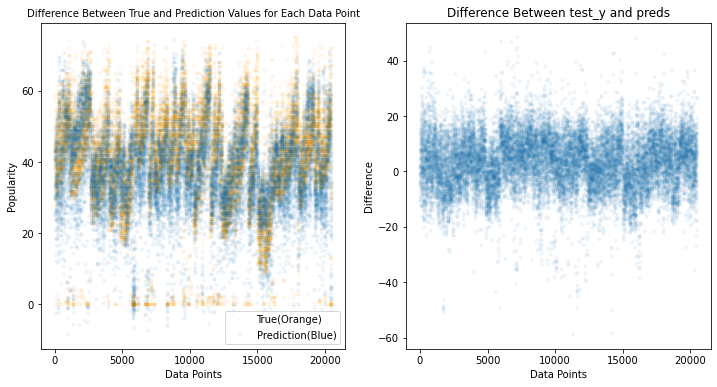

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(121)  
plt.plot(arr, test_y,'.', label='True(Orange)', alpha = 0.05, color = 'orange')
plt.plot(arr, preds,'.', label='Prediction(Blue)', alpha = 0.05)
plt.legend()
plt.ylabel('Popularity')
plt.xlabel('Data Points')
plt.title("Difference Between True and Prediction Values for Each Data Point", fontsize=10)    

plt.subplot(122)   
difference = test_y - preds
plt.plot(arr, difference, '.', alpha = 0.05)
plt.title("Difference Between test_y and preds") 
plt.ylabel('Difference')
plt.xlabel('Data Points')

<h1>Parameters Tuning: List Effects of Some Hyperparameters</h1>

Maximum Depth

In [33]:
#List the effects of different parameters
#max_depth
maxDepthArr = np.arange(8) + 1
loss_depth = np.empty(maxDepthArr.size)
loss_train_depth = np.empty(maxDepthArr.size)
for i in maxDepthArr:
    param_depth = {'gamma': 0, 'seed': 0}
    param_depth['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_depth['max_depth'] = i 
    
    model_depth = xgb.XGBRegressor(**param_depth) 
    model_depth.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_depth = model_depth.predict(test_X)

    #This one is extra, for the result
    rmse_depth = mean_squared_error(test_y, preds_depth, squared = False)
    rmse_train_depth = mean_squared_error(train_y, model_depth.predict(train_X), squared = False)
    loss_depth[i-1] = rmse_depth
    loss_train_depth[i-1] = rmse_train_depth
    print(i)


1
2
3
4
5
6
7
8


Text(0.5, 1.0, 'RMSE vs. Max Depth')

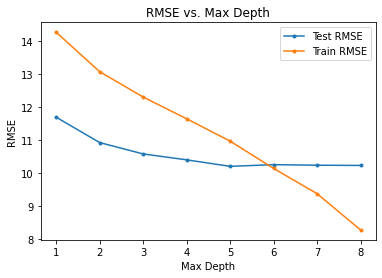

In [67]:
#Plot max_depth plot
plt.figure()
plt.plot(maxDepthArr, loss_depth, '.-', label = 'Test RMSE')
plt.plot(maxDepthArr, loss_train_depth, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Max Depth')
plt.title("RMSE vs. Max Depth") 

Learning Rate

In [65]:
#List the effects of different parameters
#learning_rate
learningRateArr = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loss_learning_rate = np.empty(learningRateArr.size)
loss_train_learning_rate = np.empty(learningRateArr.size)
count_learning_rate = 0
for i in learningRateArr:
    param_learning_rate = {'gamma': 0, 'seed': 0}
    param_learning_rate['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_learning_rate['eta'] = i 
    
    model_learning_rate = xgb.XGBRegressor(**param_learning_rate) 
    model_learning_rate.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_learning_rate = model_learning_rate.predict(test_X)

    #This one is extra, for the result
    rmse_learning_rate = mean_squared_error(test_y, preds_learning_rate, squared = False)
    rmse_train_learning_rate = mean_squared_error(train_y, model_learning_rate.predict(train_X), squared = False)
    loss_learning_rate[count_learning_rate] = rmse_learning_rate
    loss_train_learning_rate[count_learning_rate] = rmse_train_learning_rate
    count_learning_rate += 1
    print(count_learning_rate)


1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 1.0, 'RMSE vs. Learning Rate')

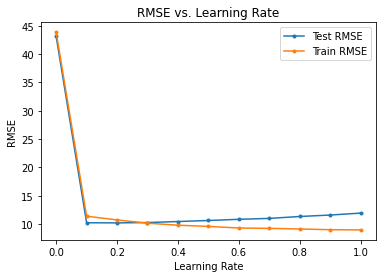

In [66]:
#Plot learning_rate plot
plt.figure()
plt.plot(learningRateArr, loss_learning_rate, '.-', label = 'Test RMSE')
plt.plot(learningRateArr, loss_train_learning_rate, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Learning Rate')
plt.title("RMSE vs. Learning Rate") 

In [62]:
#List the effects of different parameters
#learning_rate
learningRateArr2 = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
loss_learning_rate2 = np.empty(learningRateArr2.size)
loss_train_learning_rate2 = np.empty(learningRateArr2.size)
count_learning_rate2 = 0
for i in learningRateArr2:
    param_learning_rate2 = {'gamma': 0, 'seed': 0}
    param_learning_rate2['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_learning_rate2['eta'] = i 
    
    model_learning_rate2 = xgb.XGBRegressor(**param_learning_rate2) 
    model_learning_rate2.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_learning_rate2 = model_learning_rate2.predict(test_X)

    #This one is extra, for the result
    rmse_learning_rate2 = mean_squared_error(test_y, preds_learning_rate2, squared = False)
    rmse_train_learning_rate2 = mean_squared_error(train_y, model_learning_rate2.predict(train_X), squared = False)
    loss_learning_rate2[count_learning_rate2] = rmse_learning_rate2
    loss_train_learning_rate2[count_learning_rate2] = rmse_train_learning_rate2
    count_learning_rate2 += 1
    print(count_learning_rate2)


1
2
3
4
5
6
7
8
9
10
11


Text(0.5, 1.0, 'RMSE vs. Learning Rate')

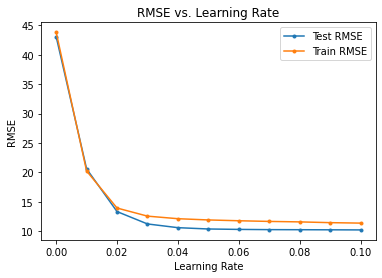

In [63]:
#Plot learning_rate plot
plt.figure()
plt.plot(learningRateArr2, loss_learning_rate2, '.-', label = 'Test RMSE')
plt.plot(learningRateArr2, loss_train_learning_rate2, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Learning Rate')
plt.title("RMSE vs. Learning Rate") 

Minimum Loss Reduction

In [77]:
#List the effects of different parameters
#min_split_loss
gammaArr = np.arange(50)
loss_gamma = np.empty(gammaArr.size)
loss_train_gamma = np.empty(gammaArr.size)
count_gamma = 0
for i in gammaArr:
    param_gamma = {'seed': 0}
    param_gamma['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_gamma['gamma'] = i
    
    model_gamma = xgb.XGBRegressor(**param_gamma) 
    model_gamma.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_gamma = model_gamma.predict(test_X)

    #This one is extra, for the result
    rmse_gamma = mean_squared_error(test_y, preds_gamma, squared = False)
    rmse_train_gamma = mean_squared_error(train_y, model_gamma.predict(train_X), squared = False)
    loss_gamma[count_gamma] = rmse_gamma
    loss_train_gamma[count_gamma] = rmse_train_gamma
    count_gamma += 1
    print(count_gamma)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


Text(0.5, 1.0, 'RMSE vs. Minimum Split Loss')

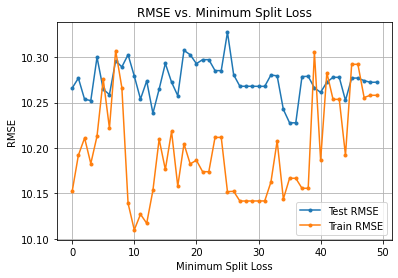

In [79]:
#Plot min_split_loss plot
plt.figure()
plt.plot(gammaArr, loss_gamma, '.-', label = 'Test RMSE')
plt.plot(gammaArr, loss_train_gamma, '.-', label = 'Train RMSE')
plt.legend()
plt.grid()
plt.ylabel('RMSE')
plt.xlabel('Minimum Split Loss')
plt.title("RMSE vs. Minimum Split Loss") 

Tree Method

In [68]:
#List the effects of different parameters
#tree_method
treeArr = np.array(['auto','exact', 'approx', 'hist', 'gpu_hist'])
loss_tree = np.empty(treeArr.size)
loss_train_tree = np.empty(treeArr.size)
for i in range(0, treeArr.size):
    param_tree = {'gamma': 0, 'seed': 0}
    param_tree['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_tree['tree_method'] = treeArr[i] 
    
    model_tree = xgb.XGBRegressor(**param_tree) 
    model_tree.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_tree = model_tree.predict(test_X)

    #This one is extra, for the result
    rmse_tree = mean_squared_error(test_y, preds_tree, squared = False)
    rmse_train_tree = mean_squared_error(train_y, model_tree.predict(train_X), squared = False)
    loss_tree[i] = rmse_tree
    loss_train_tree[i] = rmse_train_tree
    print(i)


0
1
2
3
4


Text(0.5, 1.0, 'RMSE vs. Tree Method')

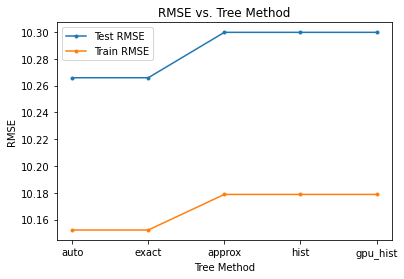

In [71]:
#Plot tree_method plot
plt.figure()
plt.plot(treeArr, loss_tree, '.-', label = 'Test RMSE')
plt.plot(treeArr, loss_train_tree, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Tree Method')
plt.title("RMSE vs. Tree Method") 

Subsample Ratio

In [98]:
#List the effects of different parameters
#subsample
subsampleArr = np.array([0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006,0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
loss_subsample = np.empty(subsampleArr.size)
loss_train_subsample = np.empty(subsampleArr.size)
for i in range(0, subsampleArr.size):
    param_subsample = {'gamma': 0, 'seed': 0}
    param_subsample['subsample'] = evalArr[i] #This one is for training
    
    model_subsample = xgb.XGBRegressor(**param_subsample) 
    model_subsample.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_subsample = model_subsample.predict(test_X)

    #This one is extra, for the result
    rmse_subsample = mean_squared_error(test_y, preds_subsample, squared = False)
    rmse_train_subsample = mean_squared_error(train_y, model_subsample.predict(train_X), squared = False)
    loss_subsample[i] = rmse_subsample
    loss_train_subsample[i] = rmse_train_subsample
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'RMSE vs. Subsample Ratio')

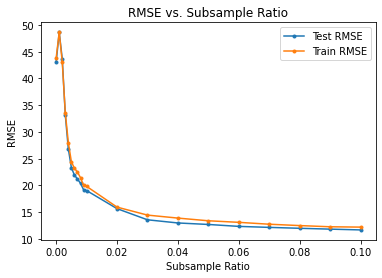

In [100]:
#Plot subsample plot
plt.figure()
plt.plot(evalArr, loss_subsample, '.-', label = 'Test RMSE')
plt.plot(evalArr, loss_train_subsample, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Subsample Ratio')
plt.title("RMSE vs. Subsample Ratio") 

In [144]:
#List the effects of different parameters
#rate_drop
rateDropArr = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
loss_rateDrop = np.empty(rateDropArr.size)
loss_train_rateDrop = np.empty(rateDropArr.size)
for i in range(0, rateDropArr.size):
    param_rateDrop = {'gamma': 0, 'seed': 0}
    param_rateDrop['eval_metric'] = 'rmse' #if default, according to objective #This one is for training
    
    param_rateDrop['booster'] = 'dart' 
    param_rateDrop['rate_drop'] = boosterArr[i] 

    model_rateDrop = xgb.XGBRegressor(**param_rateDrop) 
    model_rateDrop.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
    preds_rateDrop = model_rateDrop.predict(test_X)

    #This one is extra, for the result
    rmse_rateDrop = mean_squared_error(test_y, preds_rateDrop, squared = False)
    rmse_train_rateDrop = mean_squared_error(train_y, model_rateDrop.predict(train_X), squared = False)
    loss_rateDrop[i] = rmse_rateDrop
    loss_train_rateDrop[i] = rmse_train_rateDrop
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'RMSE vs. Dropout Rate')

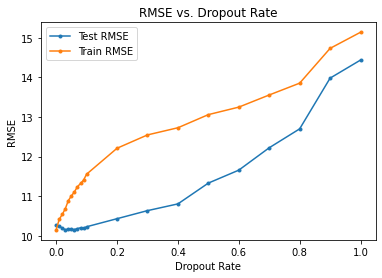

In [146]:
#Plot rate_drop plot
plt.figure()#0.03
plt.plot(rateDropArr, loss_rateDrop, '.-', label = 'Test RMSE')
plt.plot(rateDropArr, loss_train_rateDrop, '.-', label = 'Train RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Dropout Rate')
plt.title("RMSE vs. Dropout Rate") 

<h1>Final Model: With Optimized Parameters</h1>

Set Up Parameters

In [141]:
# set parameters
param_final = {'seed': 0}
param_final['max_depth'] = 5 
# param_final['eta'] = 0.02 
param_final['gamma'] = 36
# param_final['subsample'] = 0.01 
param_final['booster'] = 'dart'
param_final['rate_drop'] = 0.03
param_final['eval_metric'] = 'rmse' #if default, according to objective

print(param_final)

{'seed': 0, 'max_depth': 5, 'gamma': 36, 'booster': 'dart', 'rate_drop': 0.03, 'eval_metric': 'rmse'}


Train and Calculate the RMSE

In [142]:
# train
model_final = xgb.XGBRegressor(**param_final) 
model_final.fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose = False)
preds_final = model_final.predict(test_X)

#This one is extra, for the result
rmse_final = mean_squared_error(test_y, preds_final, squared = False)
rmse_train_final = mean_squared_error(train_y, model_final.predict(train_X), squared = False)
print("RMSE for Test Data:", rmse_final)
print("RMSE for Train Data:", rmse_train_final)

RMSE for Test Data: 10.26538373808193
RMSE for Train Data: 11.419627520489362


In [147]:
print("RMSE for Test Data:", rmse_final)
print("RMSE for Train Data:", rmse_train_final)
print("Change of RMSE for Test Data:", rmse_final - rmse)
print("Change of RMSE for Train Data:", rmse_train_final - rmse_train)

RMSE for Test Data: 10.26538373808193
RMSE for Train Data: 11.419627520489362
Change of RMSE for Test Data: -0.0005645119720547598
Change of RMSE for Train Data: 1.2673962505215037
